[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gcmatos/python-para-geociencias/blob/master/notebooks/3.2%20EDA%20Erupções%20Vulcânicas%20do%20Holoceno.ipynb)

Ctrl/Cmd + click para abrir em uma nova aba do navegador web e utilizar o Google Colab para rodar o tutorial.

# Análise Exploratória de Dados
__Vulcanismo no Holoceno do "The Smithsonian Institution"__

Fonte: [https://www.kaggle.com/smithsonian/volcanic-eruptions](https://www.kaggle.com/smithsonian/volcanic-eruptions)



## Configuração de ambiente


### Instalação de dependências

In [1]:
# Instalar GeoPandas e dependências
# !pip install shapely fiona six geopandas

### Importar bibliotecas

In [2]:
# Processamento
import numpy as np
import pandas as pd
import geopandas as gpd
import cartopy
import cartopy.crs as ccrs
from shapely.geometry import Point

# Visualizacao
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar alertas
import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline

In [4]:
# Matplotlib style
plt.style.use('default')

### Subir arquivos
Subir o arquivo **`volcanic-eruptions-database.csv`**


In [5]:
# Subir arquivo

In [6]:
# Listar arquivos no diretório de trabalho
# %ls

### Importação dos dados

In [7]:
df = pd.read_csv("../data/volcanic-eruptions-database.csv")

## Auditando dados
> [Descrição das variáveis no web site do Smithsonian Institution](https://volcano.si.edu/)

Trata-se de uma série ou uma tabela de atributos?

In [8]:
df.head()
# df.tail()

,Number,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
0,210010,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Maar(s),Eruption Dated,8300 BCE,50.170,6.85,600,Foidite,Rift Zone / Continental Crust (>25 km)
1,210020,Chaine des Puys,France,Mediterranean and Western Asia,Lava dome(s),Eruption Dated,4040 BCE,45.775,2.97,1464,Basalt / Picro-Basalt,Rift Zone / Continental Crust (>25 km)
2,210030,Olot Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Evidence Credible,Unknown,42.170,2.53,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental Crust (>25 km)
3,210040,Calatrava Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Eruption Dated,3600 BCE,38.870,-4.02,1117,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)
4,211001,Larderello,Italy,Mediterranean and Western Asia,Explosion crater(s),Eruption Observed,1282 CE,43.250,10.87,500,No Data,Subduction Zone / Continental Crust (>25 km)


Quais são os nomes (*labels*) das variáveis e dos índices?

In [9]:
df.columns

Index(['Number', 'Name', 'Country', 'Region', 'Type', 'Activity Evidence',
       'Last Known Eruption', 'Latitude', 'Longitude', 'Elevation (Meters)',
       'Dominant Rock Type', 'Tectonic Setting'],
      dtype='object')

> Que tipos de objetos o pandas reconheceu durante a importação dos dados?

> Há variáveis numéricas e categóricas?

> Colunas com datas foram reconhecidas como `pandas.to_datetime` durante a importação?

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 12 columns):
Number                 1508 non-null int64
Name                   1508 non-null object
Country                1508 non-null object
Region                 1508 non-null object
Type                   1508 non-null object
Activity Evidence      1507 non-null object
Last Known Eruption    1508 non-null object
Latitude               1508 non-null float64
Longitude              1508 non-null float64
Elevation (Meters)     1508 non-null int64
Dominant Rock Type     1455 non-null object
Tectonic Setting       1501 non-null object
dtypes: float64(2), int64(2), object(8)
memory usage: 141.5+ KB


Resumo estatístico das variáveis numéricas:

In [11]:
df.describe()

,Number,Latitude,Longitude,Elevation (Meters)
count,1508.000000,1508.000000,1508.000000,1508.000000
mean,296656.110743,14.083156,23.391469,1683.357427
std,48861.852600,31.871107,113.656588,1571.102885
min,210010.000000,-78.500000,-179.970000,-4200.000000
25%,261157.500000,-7.068750,-78.274250,687.250000
50%,300015.000000,13.861500,38.390000,1464.000000
75%,342123.250000,41.748750,138.578000,2352.250000
max,390847.000000,85.608000,179.580000,6879.000000


### Valores nulos
Como é a distribuição de valores nulos no dataset?

In [12]:
df.isnull().sum().sort_values()

Number                  0
Name                    0
Country                 0
Region                  0
Type                    0
Last Known Eruption     0
Latitude                0
Longitude               0
Elevation (Meters)      0
Activity Evidence       1
Tectonic Setting        7
Dominant Rock Type     53
dtype: int64

### Variáveis categóricas

Como estão distribuídas as categorias das variáveis categóricas?

In [13]:
df['Type'].value_counts()

Stratovolcano          597
Shield                 129
Stratovolcano(es)      121
Submarine              116
Pyroclastic cone(s)     99
Volcanic field          88
Caldera                 86
Complex                 54
Lava dome(s)            38
Shield(s)               35
Pyroclastic cone        18
Fissure vent(s)         16
Compound                14
Maar(s)                 13
Lava dome               12
Caldera(s)              11
Tuff cone(s)             9
Pyroclastic shield       8
Maar                     8
Crater rows              6
Subglacial               6
Stratovolcano?           4
Lava cone                3
Tuff cone                3
Unknown                  3
Submarine(es)            2
Explosion crater(s)      2
Fissure vent             2
Cone(s)                  1
Tuff ring(s)             1
Lava cone(s)             1
Complex(es)              1
Volcanic field(s)        1
Name: Type, dtype: int64

### Série de tempo
Conferindo os valores de tempo informados na coluna 'Last Known Eruption'.

In [14]:
# Verificando tipo de variável
df['Last Known Eruption'].dtype
# df['Last Known Eruption'].sample(5)

dtype('O')

In [15]:
# Substituir valores nulos
df['Last Known Eruption'].replace({'Unknown': np.nan}, inplace=True)

In [16]:
# Separar os valores de tempo do período (BCE, CE)
df[['Year', 'Period']] = df['Last Known Eruption'].str.split(' ', expand=True)

In [17]:
df['Year'].sample(5)

620      NaN
777     3550
1105    4470
457     2003
559     1923
Name: Year, dtype: object

In [18]:
# Imprimir valores únicos
df['Period'].unique()

array(['BCE', nan, 'CE'], dtype=object)

In [19]:
# Converter valores em números
df['Year'] = pd.to_numeric(df['Year'])
df['Year'].sample(5)

1356    1750.0
1266     290.0
1389       NaN
666     1967.0
521        NaN
Name: Year, dtype: float64

In [20]:
# Converter valores de 'Year' para CE > 0, BCE < 0
mask = df['Period'] == 'BCE'
df['Year'][mask] = -df['Year']

### Converter DataFrame em GeoDataFrame

Converter as colunas Latitude e Longitude em geometria `shapely` para converter o dataset em `GeoDataFrame`.

In [21]:
# Criar coluna 'geometry' com lista concatenada de Lon e Lat
df['geometry'] = list(zip(df.Longitude, df.Latitude))
# Converter lista em objeto shapely.geometry.Point
df['geometry'] = df['geometry'].apply(Point)
# Converter DataFrame em GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry')
# Inserir código para sistema de coordenadas WGS84
gdf.crs = {'init' :'epsg:4326'}

## Visualização

### Pré-visualização

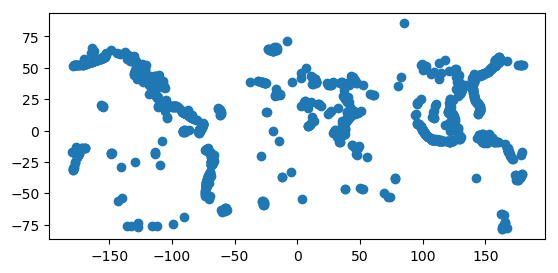

In [22]:
# df.plot();
gdf.plot();

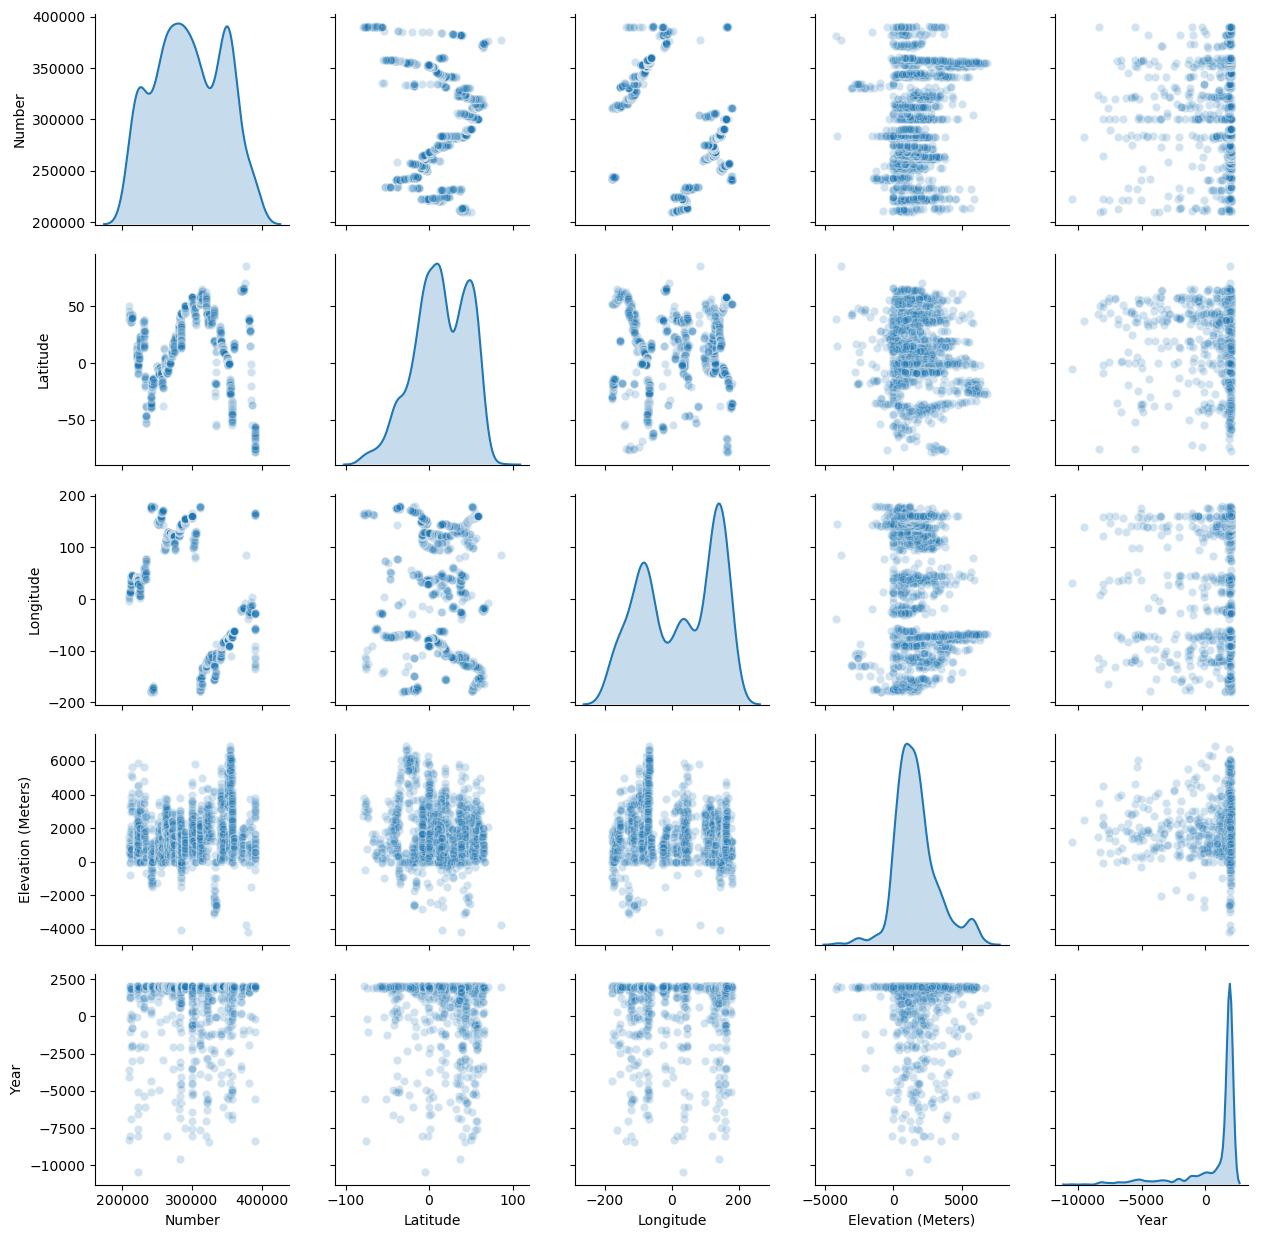

In [23]:
sns.pairplot(gdf, diag_kind='kde', plot_kws={'alpha': 0.2});

### Valores nulos

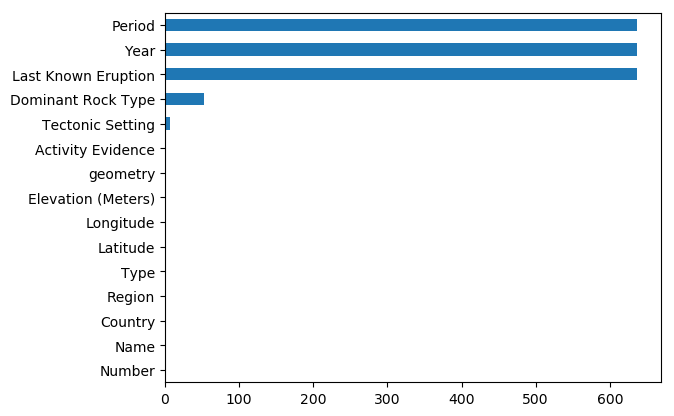

In [24]:
# Plotar a soma ordenada dos valores nulos por variável
gdf.isnull().sum().sort_values().plot.barh();

### Variáveis contínuas

In [25]:
# Funçoões úteis para plotar gráficos (Helper functions)
def line_plot(data):
    '''Plotar série de valores ordenados em gráfico de linha'''
    series = pd.Series(data).value_counts().sort_index()
    return series.plot()


def bar_plot(data):
    '''Plotar série de valores ordenados em gráfico de barras'''
    series = pd.Series(data).value_counts().sort_values()
    return series.plot(kind='bar')


def barh_plot(data):
    '''Plotar série de valores ordenados em gráfico de barras'''
    series = pd.Series(data).value_counts().sort_values()
    return series.plot(kind='barh')

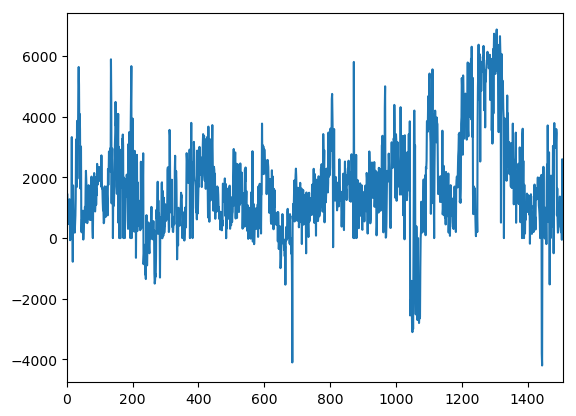

In [26]:
gdf['Elevation (Meters)'].plot();
# line_plot(gdf['Elevation (Meters)']);

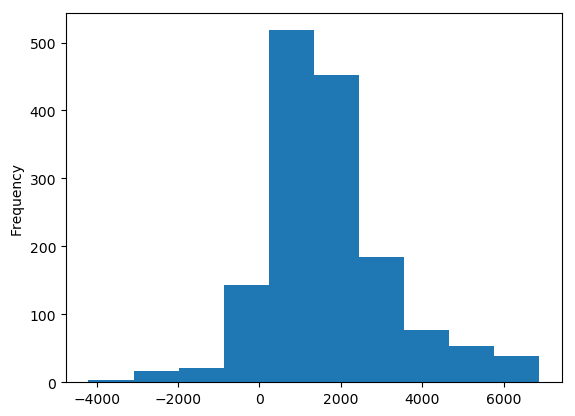

In [27]:
gdf['Elevation (Meters)'].plot.hist();

### Variáveis categóricas

Qual é a distribuição anual de atividades vulcânicas neste data set? 

A variação observada é resultado da variação de atividade vulcânica no planeta ou é um efeito da amostragem?

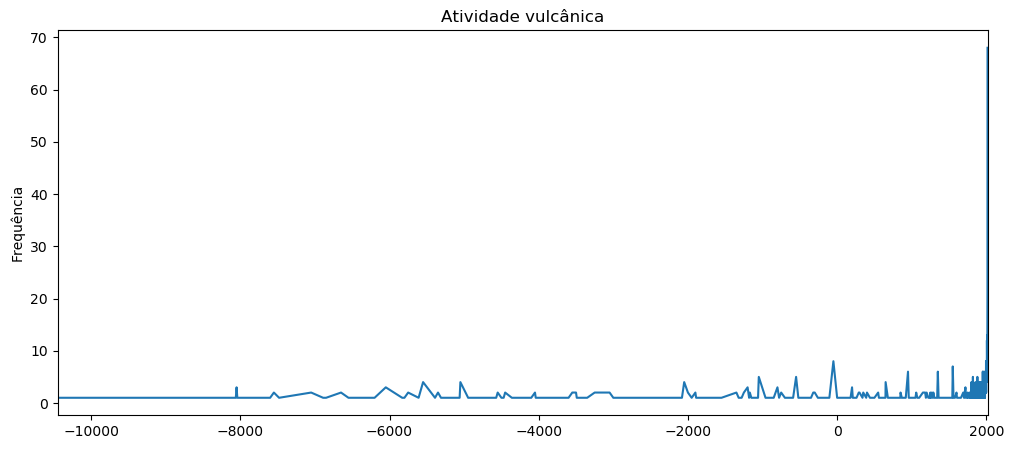

In [28]:
plt.figure(figsize=(12, 5))

line_plot(gdf["Year"])
# bar_plot(gdf["Year"])

plt.ylabel("Frequência")
plt.title("Atividade vulcânica");

Text(0.5, 1.0, 'Regiões com mais vulcanismo durante o Holoceno')

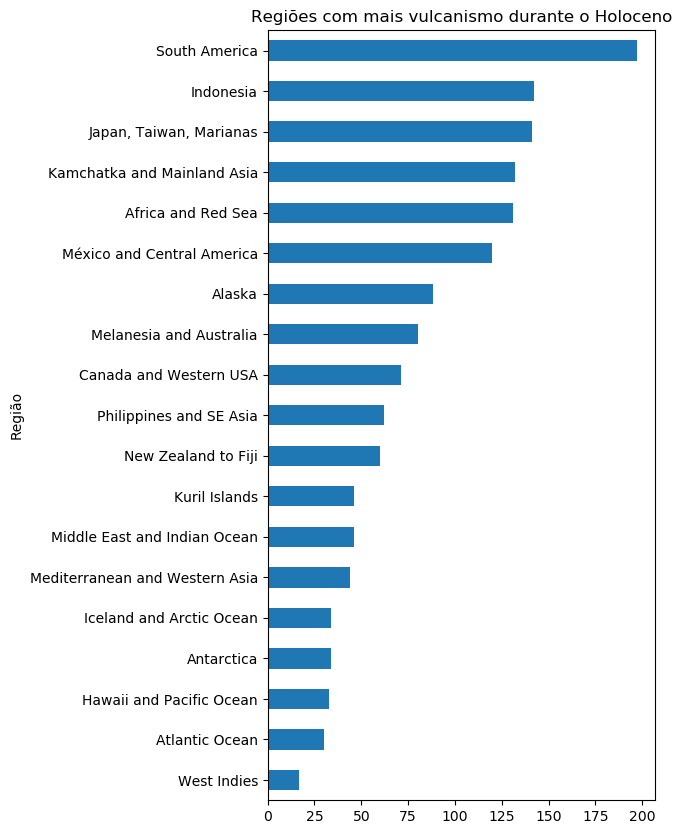

In [29]:
plt.figure(figsize=(5, 10))
barh_plot(gdf["Region"])
# gdf["Region"].value_counts().sort_values().plot.barh()
plt.ylabel("Região")
plt.title("Regiões com mais vulcanismo durante o Holoceno")

Qual é a distribuição de atividades vulcânicas por país? 

A diferença encontrada é um fator geológico ou de desenvolvimento científico?

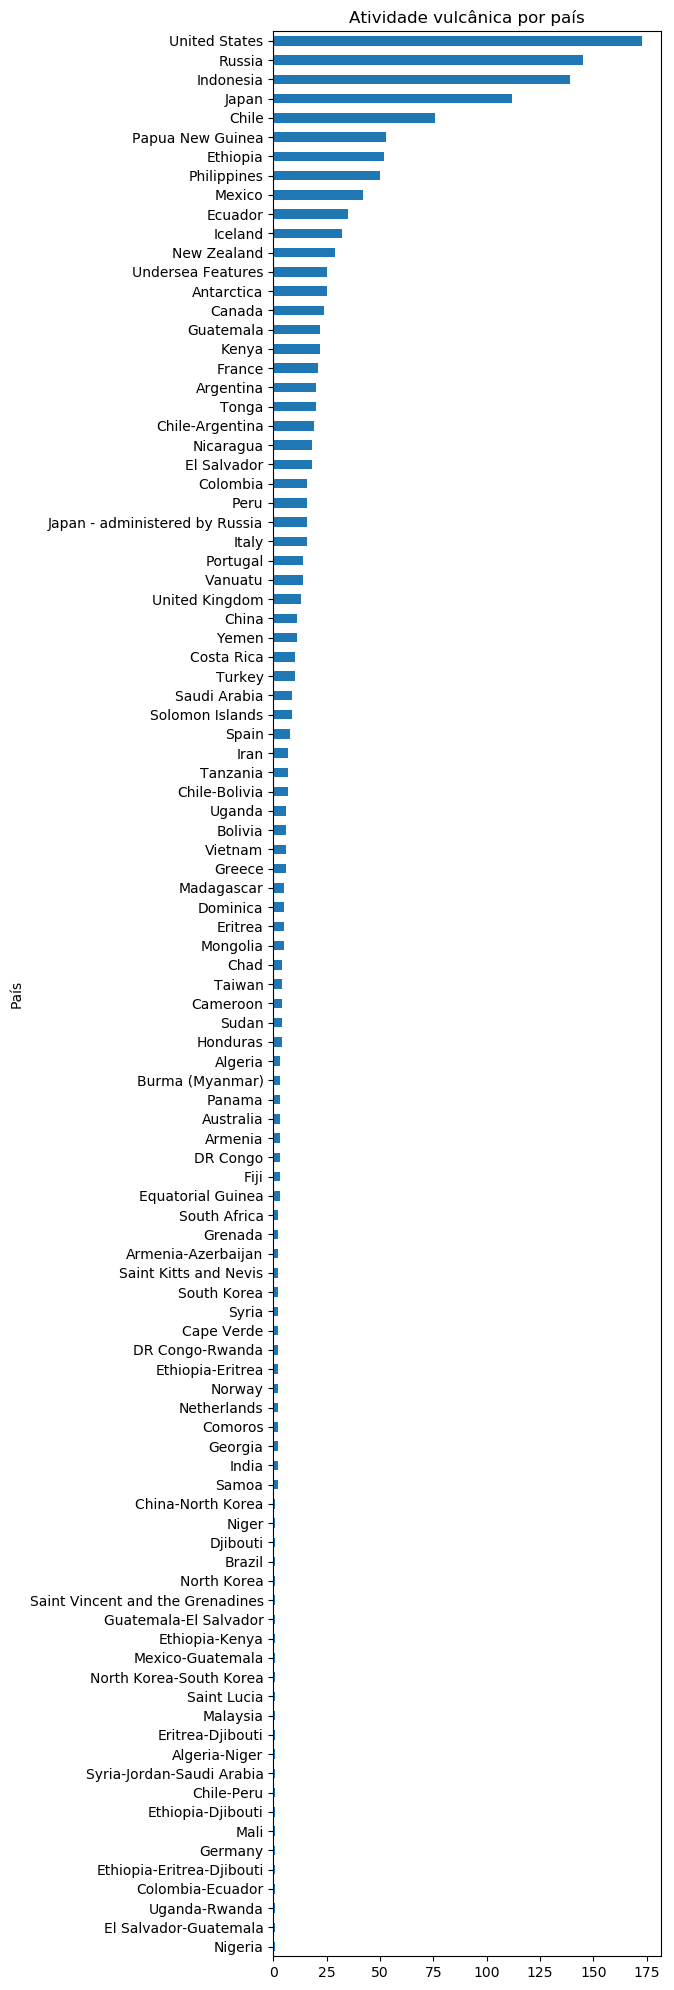

In [30]:
plt.figure(figsize=(5, 25))
barh_plot(gdf["Country"])
# gdf["Country"].value_counts().sort_values().plot.barh()
plt.ylabel("País")
plt.title("Atividade vulcânica por país")
plt.show()

Quais são os tipos de evidências de vulcanismo neste dataset?

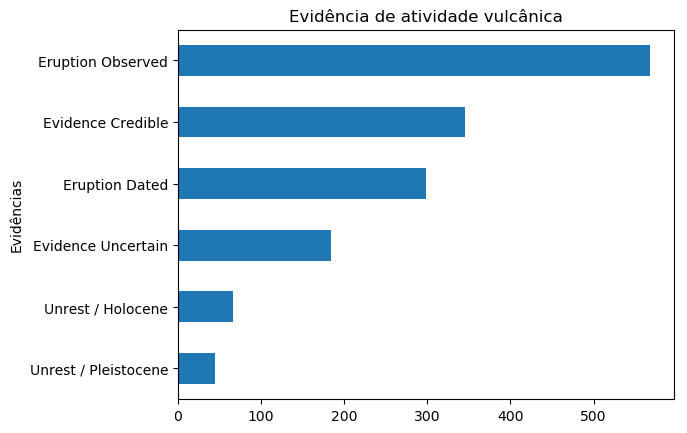

In [31]:
# gdf["Activity Evidence"].value_counts().sort_values().plot.barh()
barh_plot(gdf["Activity Evidence"])
plt.ylabel("Evidências")
plt.title("Evidência de atividade vulcânica")
plt.show()

Quais são os tipos de rochas dominantes no dataset?

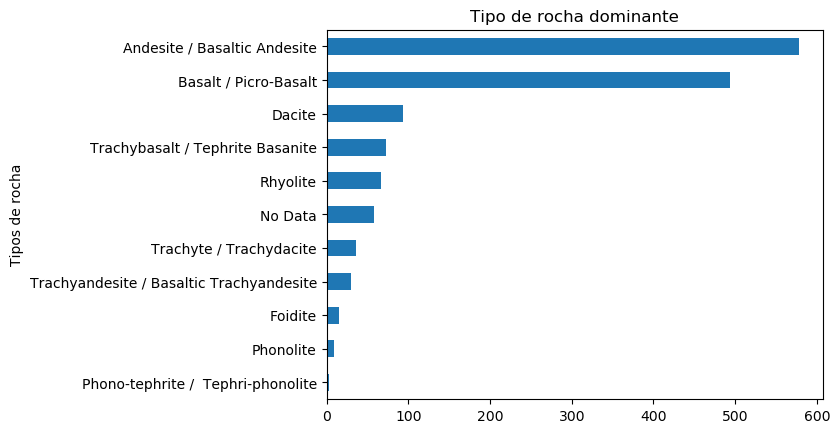

In [32]:
# gdf["Dominant Rock Type"].value_counts().sort_values().plot.barh()
barh_plot(gdf["Dominant Rock Type"])
plt.ylabel("Tipos de rocha")
plt.title("Tipo de rocha dominante")
plt.show()

Quais são os regimes tectônicos?

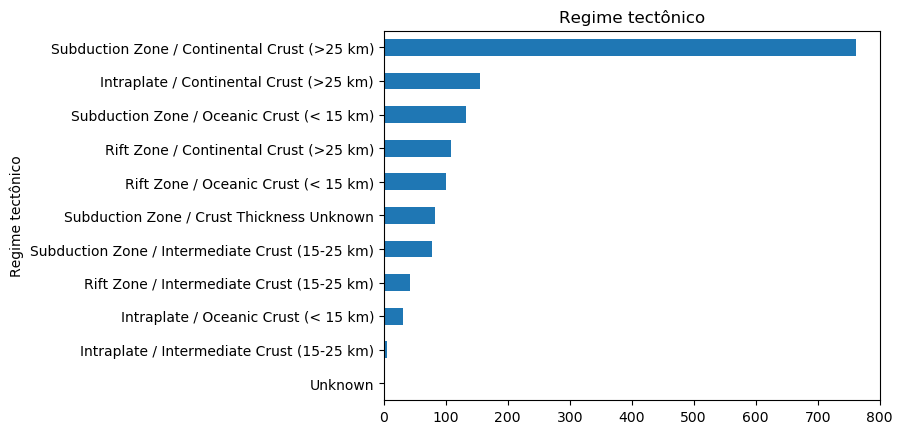

In [33]:
# gdf["Tectonic Setting"].value_counts().sort_values().plot.barh()
barh_plot(gdf["Tectonic Setting"])
plt.ylabel("Regime tectônico")
plt.title("Regime tectônico")
plt.show()

### Correlações entre variáveis

In [34]:
# Calcular a matrix de correlação
corr = gdf.corr()
# Plotar a matriz de correlação
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Number,Latitude,Longitude,Elevation (Meters),Year
Number,1,-0.063,-0.48,0.24,-0.015
Latitude,-0.063,1,0.079,-0.15,-0.11
Longitude,-0.48,0.079,1,-0.19,0.061
Elevation (Meters),0.24,-0.15,-0.19,1,-0.05
Year,-0.015,-0.11,0.061,-0.05,1


### Distribuição espacial

In [35]:
# Carregar o shape com os contornos dos países do GeoPandas.dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

Como estão distribuídos as erupções vulcânicas em termos de coordenadas geográficas?

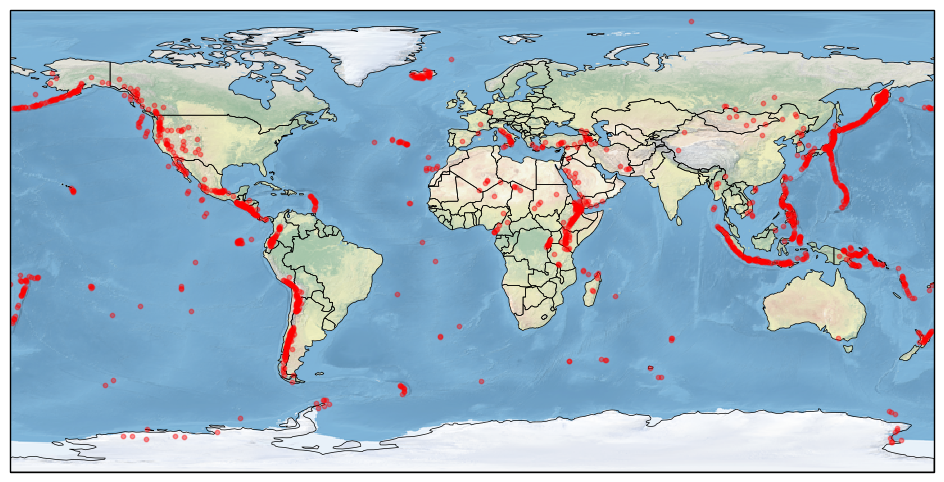

In [36]:
fig = plt.figure(figsize=(15, 6))
# Criar instancia Cartopy
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
# Adicionar raster de terreno
ax.stock_img()
# Plotar os contornos dos países com GeoPandas
world.plot(ax=ax, facecolor='none', linewidth=0.5, edgecolor='black')
# Plotar os registros dos terremotos
gdf.plot(ax=ax, color='red', markersize=10, alpha=0.4)
plt.show()

Qual é a frequencia de erupções vulcânicas por localidade?

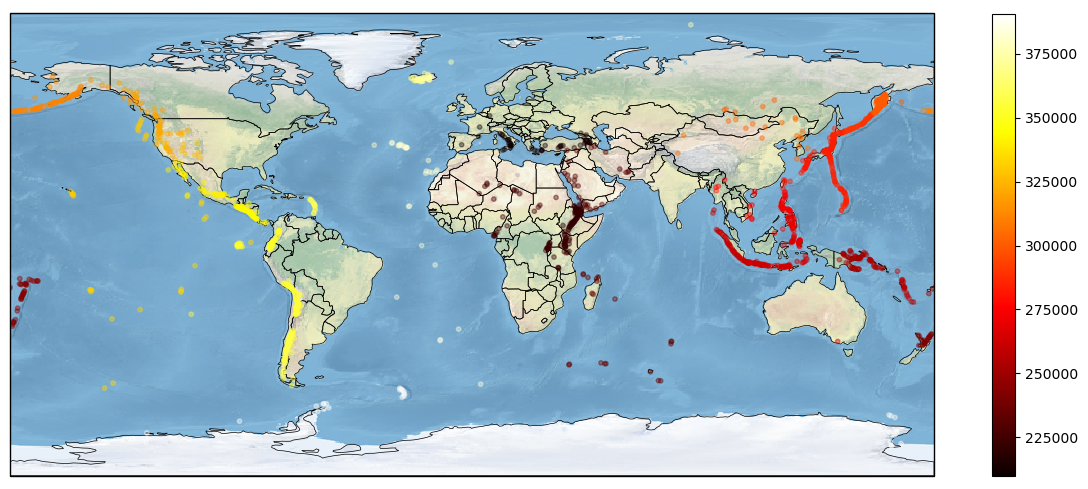

In [37]:
fig = plt.figure(figsize=(15, 6))
# Criar instancia Cartopy
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
# Adicionar raster de terreno
ax.stock_img()
# Plotar os contornos dos países com GeoPandas
world.plot(ax=ax, facecolor='none', linewidth=0.5, edgecolor='black')
# Plotar os registros dos terremotos
gdf.plot(
    ax=ax, column='Number', markersize=10, alpha=0.4, cmap='hot', legend=True)
plt.show()